# Neural Networks (Day 8)

## Part 1: Perceptron Review

We'll go over __perceptrons__ here, in case you were having difficulty with the lecture and discussion material. "Perceptron" is just a fancy term for "single neuron in a neural network"; so you can think of this review as an intro to neural networks as well.

There's nothing for you to fill in for this part. If you want to skip to the problems, move on to Part 2.

### Example:

Let’s say you want to have lunch. You consider these four factors:
-	Is there anything left in the fridge? (0 as none, 1 as there are food left)
-	Is there any restaurant within 3 miles? (0 as none, 1 as there are restaurants)
-	Is it sunny now? (0 as raining, 1 as clear sky)
-	Are you using a RTX3090 GPU? (0 as no, 1 as yes)

We can use a perceptron to help us with this decision. Here's what that perceptron might look like.

![perceptron_example](https://drive.google.com/uc?export=view&id=1kkYCUNg75xvdLFRClRrtcrBgBwXRRfj9)

We want to use these four factors to decide whether you want to eat a leftover food or you want to get a lunch from a restaurant. Let’s classify if $ output <=0$, you want to eat leftover food, else you want to grab food from outside. For simplicity, let’s set every bias to zero and use ReLU as an activation function.

We let

$$
    ReLU(x) =
    \begin{cases}
        0 & \text{if $x<=0$,}\\
        x & \text{if $x>0$}
    \end{cases}
$$

In practice, we initialize weights and biases with random number, and we use backpropagation algorithm (will discuss later) to adjust the weights and biases correctly. For this problem, let us initialize the weight analytically.

Imagine a weight as “how important is this feature?” If we want to emphasize that a feature is very important, we then adjust its weight to some large positive number (or negative if it inversely affects the importance). Otherwise, if a feature is less important, we then adjust its weight to some small number.

![perceptron_calculated](https://drive.google.com/uc?export=view&id=1srvS1VJpLc4XXDogbX2Qj4DVXckEPVUN)

From earlier section, we let $\sigma = ReLU(Z)$ as our activation function.

We then substitute $Z$ with $Z = \sum_{i=1}^4 w_i x_i$

We calculate

$$
\begin{align}
Z & = \sum_{i=1}^4 w_i x_i \\
& = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 \\
& = (1\cdot-3)+(1\cdot2)+(0\cdot3)+(1\cdot0.01) \\
& = -3 + 2 + 0 + 0.01 \\
& = -0.99
\end{align}
$$

And we then compute output

$$
\begin{align}
output & = \sigma(Z) \\
& = ReLU(Z) \\
& = ReLU(-0.99) \\
& = 0
\end{align}
$$

Suppose you believe having leftover food in the fridge is important, then you initialize its weight to -3. Having RTX3090 has less effect to how you decide to eat, so you initialize its weight to 0.01. After final calculation with activation function, it returns 0. So you decide to not eat outside and eat the food you have.


That's the end! Modern neural networks are much more interesting than just this example would have you believe -- I can't recommend https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi highly enough. Give the first or second video a look through!

# Part 2: Problems with Perceptrons

## Creating an "AND" gate.

With the right parameters, perceptrons can be used to simulate basic logic operations. As an example, let's use a single perceptron to simulate an "AND" gate.

An "AND" gate is a piece of circuitry that implements the logical $\text{and}$ operator. You may recognize this operator from previous CS classes. $\text{and}(x_1,x_2)$ returns 1 only when both of its inputs are 1; otherwise, it returns zero. In other words:

$\text{and}(x_1, x_2)$ is defined over $x_1, x_2 \in \{0, 1\}$ such that:

- $\text{and}(0, 0) = 0$
- $\text{and}(0, 1) = 0$
- $\text{and}(1, 0) = 0$
- $\text{and}(1, 1) = 1$


Now, let's say that our perceptron has 3 parameters: two weights $\beta_1, \beta_2$ for $x_1$ and $x_2$ respectively, and one bias term $\beta_0$. These parameters are combined and passed through the activation function $h$, where

$$
h(x) = \begin{cases}
  0,   & \text{if } x \leq 0 \\
  1,   & \text{if } x \gt 0
\end{cases}
$$

So the output of our perceptron can be written as by $h(\beta_0 + \beta_1 x_1 + \beta_2 x_2)$

Now, let's turn our perceptron into an "and" gate. We can do this by setting $\beta_1 = 1, \beta_2 = 1$, and $\beta_0 = -1.1$. Now:

\begin{align}
  \text{perceptron}(0, 0) & = h(\beta_0 + \beta_1 x_1 + \beta_2 x_2) \\
  & = h(-1.5 + 1 x_1 + 1x_2) \\
  & = h(-1.5 + 0 + 0) \\
  & = h(-1.5)  \\
  & = 0 \\
\end{align}

\begin{align}
  \text{perceptron}(0, 1) & = h(\beta_0 + \beta_1 x_1 + \beta_2 x_2) \\
  & = h(-1.5 + 1 x_1 + 1 x_2) \\
  & = h(-1.5 + 0 + 1) \\
  & = h(-0.5)  \\
  & = 0 \\
\end{align}

\begin{align}
  \text{perceptron}(1, 0) & = h(\beta_0 + \beta_1 x_1 + \beta_2 x_2) \\
  & = h(-1.5 + 1 x_1 + 1 x_2) \\
  & = h(-1.5 + 1 + 0) \\
  & = h(-0.5)  \\
  & = 0 \\
\end{align}

\begin{align}
  \text{perceptron}(1, 1) & = h(\beta_0 + \beta_1 x_1 + \beta_2 x_2) \\
  & = h(-1.5 + 1 x_1 + 1 x_2) \\
  & = h(-1.5 + 1 + 1) \\
  & = h(0.5)  \\
  & = 1 \\
\end{align}

See what's going on?

Think about the roles of each coefficient here. $\beta_0$ is set to a really negative number. It wants to make $\beta_0 + \beta_1 x_1 + \beta_2 x_2$ negative, so $h(\beta_0 + \beta_1 x_1 + \beta_2 x_2)$ will be zero. $\beta_1$ and $\beta_2$ aren't big enough to beat $\beta_0$ alone, so they have to team up. Only when both are set to 1 does $\beta_0 + \beta_1 x_1 + \beta_2 x_2$ become positive (and $h(\beta_0 + \beta_1 x_1 + \beta_2 x_2)$ become 1).

A perceptron and some creativity can get you a long way. But to harness the true power of the perceptron, you need to combine them into _neural networks_.

## Creating a "XOR" Gate

__Now it's your turn__.

You're going to going to implement a network that will act like the "xor" function. $\text{xor}$ is a bitwise operation like "and" and "or". It returns 1 when either (but not both) of its inputs are set to 1.

$\text{xor}(x_1, x_2)$ is defined over $x_1, x_2 \in \{0, 1\}$ such that:

- $\text{xor}(0, 0) = 0$
- $\text{xor}(0, 1) = 1$
- $\text{xor}(1, 0) = 1$
- $\text{xor}(1, 1) = 0$

We're given a neural network that looks like this:

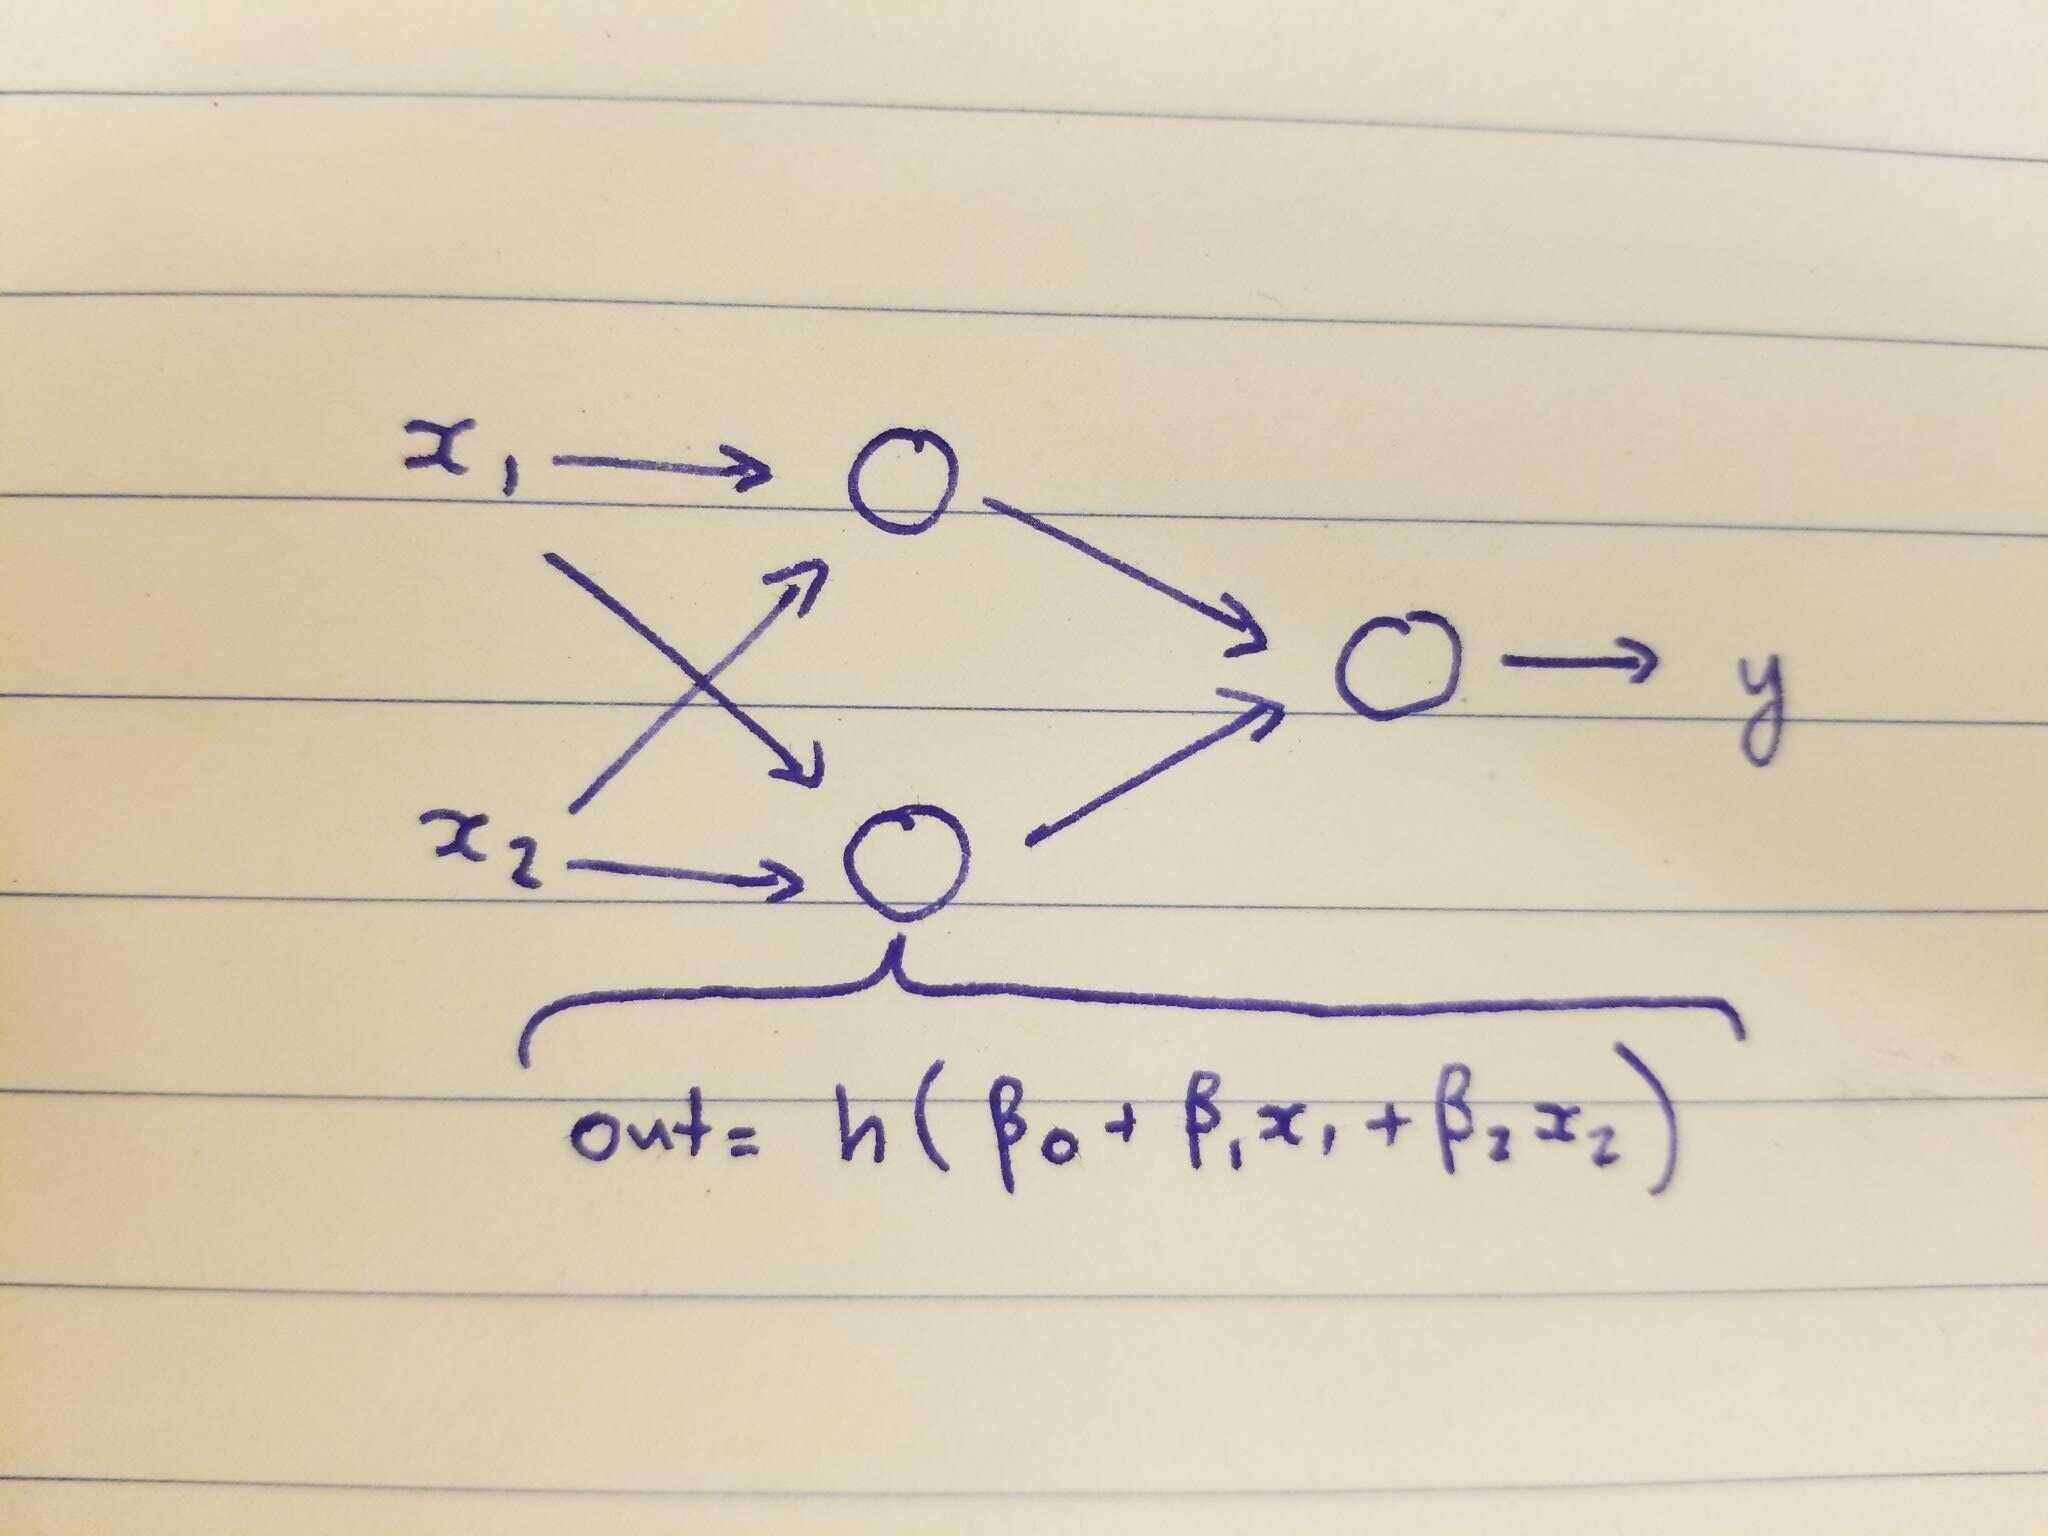

The net has two inputs, $x_1$ and $x_2$, each set to either `0` or `1`. The inputs are sent to 2 perceptrons, represented by circles. These perceptrons send their output to a third perceptron, which outputs the final output of our network.

As before, each perceptron has 3 parameters: two weights $\beta_1, \beta_2$ for $x_1$ and $x_2$ respectively, and one bias term $\beta_0$. These parameters are combined and passed through the activation function $h$, where

$$
h(x) = \begin{cases}
  0,   & \text{if } x \leq 0 \\
  1,   & \text{if } x \gt 0
\end{cases}
$$

__Q1__: Write down a set of parameters for each neuron that will allow the whole net to act like "xor". Don't use a computer.

Hint: Use the first two neurons to check for different conditions.

node 1: b0 is 1, b1 is 1, bias is -1.5 (and)

node 2: b0 is 1, b2 is 1, bias is -0.5 (or)

node 3: coming from node 1 is b0=1, coming from node 2 is b1=-1000


__Q2__: Is your answer to Q1 the _only_ set of coefficients that will allow you to implement XOR? Explain why or why not.

No, you can scale the variables by a constant, or flip the 2 nodes in the first layer

__Q4__: Could you train logistic regression to implement AND? Why or why not?

Hint: Try plotting $\text{and}(x, y)$. Can you draw a straight line that separates the 0s from the 1s?

Yes

__Q3__: Could you train a logistic regression model to implement XOR? Why or why not?

Hint: Try plotting $\text{xor}(x, y)$. Can you draw a straight line that separates the 0s from the 1s?

Yes. Training could lead to the solutions for b0, b1, and b2 above

__Bonus__: Do you think it's possible to use a perceptron to implement $\text{and}$?

Yes, just look at the first layer neuron that encodes for and

# Part 3: Example Neural Network Code

You've finished all the questions for this lab!

We know that many of you are doing neural-net based final projects, so here are some coding resources you might find useful.

Firstly, we recommend a nice "Intro to PyTorch" notebook
[here](https://drive.google.com/file/d/1mEULK41oEFME-oAtB2HWv62U_IpisJ4p/view?usp=sharing). PyTorch is a commonly used library for training advanced neural network models.

Alternatively, you can stick with `sklearn`. Below is a quick-and-dirty example net that will recognize handwritten digits (from the "MNIST" dataset).

Credit: adapted from Crashcourse AI (https://www.youtube.com/watch?v=6nGCGYWMObE)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number: 0


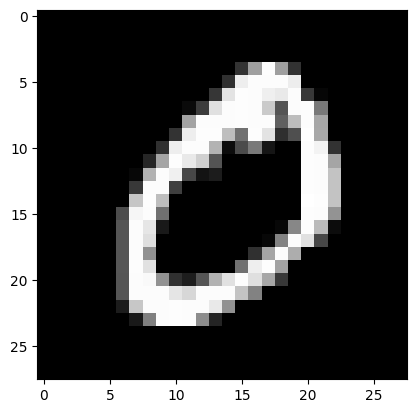

In [ ]:
from keras.datasets import mnist  # A dataset of many handwritten numbers
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data() # you know what it is B)

# Example: Show the images we're working with
img_index = 1 # <-- change this index to see different number picture
print("Number: {}".format(y_train[img_index]))
plt.imshow(X_train[img_index], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# Convert pixel range to between 0 and 1 to make the model learning easier.
# We don't want black and white and grey, just black and white.
X_train = X_train / 255
X_test = X_test / 255

# convert all 2D pixel picture into 1D vectors. The model doesn't care.
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [ ]:
# import multi-layer perceptron classifier. This is the neural network.
#  (we've covered MLP classifiers in class, although not by name)
from sklearn.neural_network import MLPClassifier

# This is what network architecture looks like.
# We have 100 hidden layers, and each hidden layer is 100 neurons "wide".
hidden_layer_architecture = (100, 100) # <----- try changing the hidden layer to make the model more accurate

# Do the TRAIN.  This might take a while.
# Watch it go for a while...see how the loss function keeps decreasing as it trains?
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_architecture, max_iter=100, alpha=1e-4,
                     solver='sgd', verbose=10, tol=1e-4, random_state=1,
                     learning_rate_init=.1)
mlp.fit(X_train, y_train)
print('\ntraining score: {}'.format(mlp.score(X_train, y_train)))
print('test score: {}'.format(mlp.score(X_test, y_test)))

Iteration 1, loss = 0.28753544
Iteration 2, loss = 0.10938545
Iteration 3, loss = 0.07773489
Iteration 4, loss = 0.06088642
Iteration 5, loss = 0.04822399
Iteration 6, loss = 0.04258652
Iteration 7, loss = 0.03356839
Iteration 8, loss = 0.02988052
Iteration 9, loss = 0.02191678
Iteration 10, loss = 0.01783335
Iteration 11, loss = 0.01631618
Iteration 12, loss = 0.01457940
Iteration 13, loss = 0.00920453
Iteration 14, loss = 0.00859577
Iteration 15, loss = 0.00744307
Iteration 16, loss = 0.00846774
Iteration 17, loss = 0.00833715
Iteration 18, loss = 0.00942848
Iteration 19, loss = 0.00957215
Iteration 20, loss = 0.00797639
Iteration 21, loss = 0.00722857
Iteration 22, loss = 0.00782240
Iteration 23, loss = 0.00420358
Iteration 24, loss = 0.00260622
Iteration 25, loss = 0.00077528
Iteration 26, loss = 0.00046811
Iteration 27, loss = 0.00042212
Iteration 28, loss = 0.00040572
Iteration 29, loss = 0.00039360
Iteration 30, loss = 0.00038476
Iteration 31, loss = 0.00037794
Iteration 32, los

Predict below picture as: 1 
while the true label is: 1


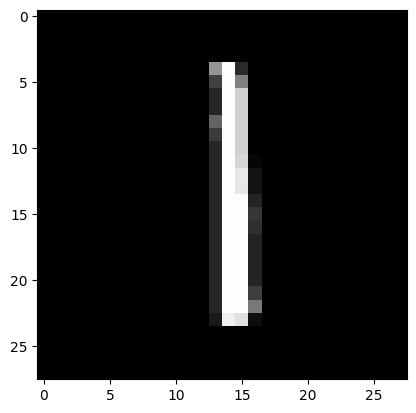

In [ ]:
# Print a picture of a test data, then tell us what the net predicted

predicted_index = 1728 # <--- change this index to see different test data point
output = mlp.predict([X_test[predicted_index]])
print("Predict below picture as: {} \nwhile the true label is: {}".format(output[0], y_test[predicted_index]))
plt.imshow(X_test[predicted_index].reshape((28,28)), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()